# Cancer Diagnosis using Keras TensorFlow 2.0


In this project we will be using Breast cancer wisconsin (diagnostic) dataset using keras api for Tensorflow. This is a classification problem.

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

   
This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

In [71]:
df = pd.read_csv('cancer_classification.csv')

In [72]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [74]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## EDA

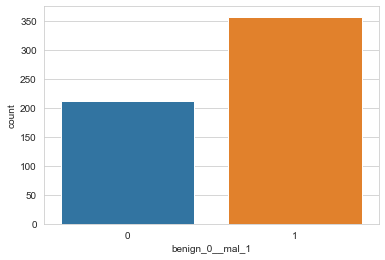

In [75]:
sns.countplot(x='benign_0__mal_1',data=df)

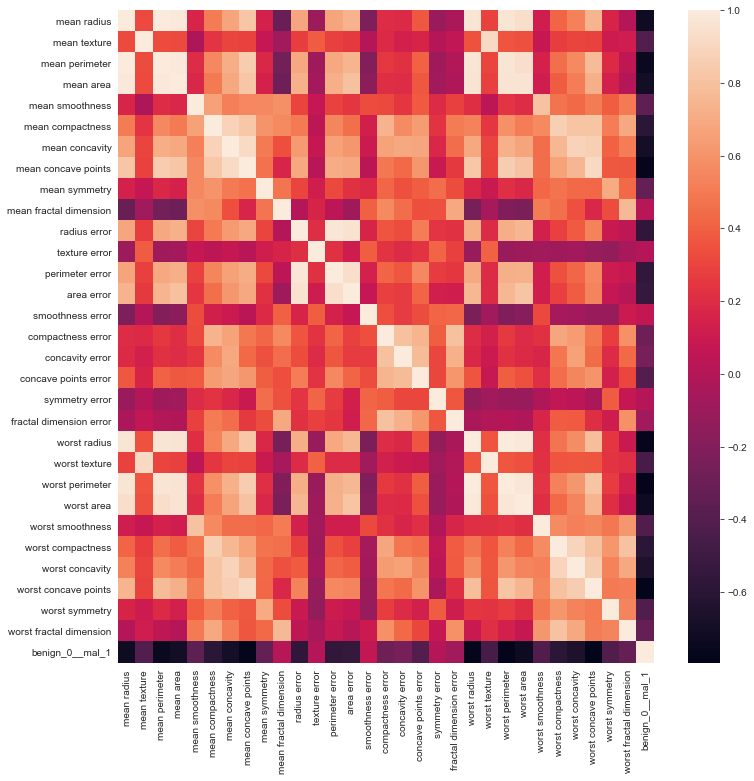

In [76]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

In [77]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

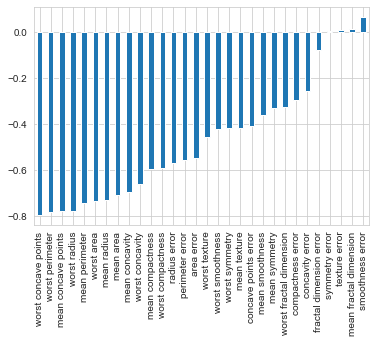

In [78]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

## Train Test Split

In [79]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)


## Scaling Data

In [82]:
from sklearn.preprocessing import MinMaxScaler

In [83]:
scaler = MinMaxScaler()

In [84]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [85]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
We will also be using **early stopping** and adding **dropout layers** to avoid overfitting.    

In [86]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [87]:
X_train.shape

(426, 30)

## Training the Model 

Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [90]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [91]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))
#rate in dropout is the probability that you're going to randomly turnoff the actual neurons
#e.x 0: it means you're taking 0% of the neurons and randomly turning them off
# 1: means 100% of the neurons are going to be turned off randomly for each batch of training
# it is not the same neurons each time, it's a random sub selection of x% of the neurons
model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [92]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 0s 10ms/step - loss: 0.7198 - val_loss: 0.6834
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6848 - val_loss: 0.6728
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6787 - val_loss: 0.6625
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6621 - val_loss: 0.6496
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6453 - val_loss: 0.6339
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6387 - val_loss: 0.6178
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6268 - val_loss: 0.5963
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5937 - val_loss: 0.5697
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5733 - val_loss: 0.5367
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5546 - val_loss: 0.5023
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.1024 - val_loss: 0.0802
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0983 - val_loss: 0.0832
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1145 - val_loss: 0.0817
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0938 - val_loss: 0.0821
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0982 - val_loss: 0.0813
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1001 - val_loss: 0.0787
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1002 - val_loss: 0.0758
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1047 - val_loss: 0.0814
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1003 - val_loss: 0.0859
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1107 - val_loss: 0.0917
Epoch 93/600


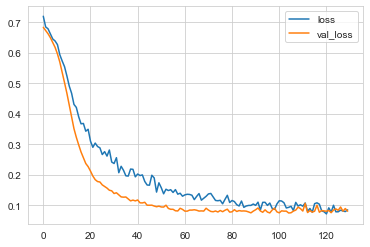

In [93]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Model Evaluation

In [94]:
predictions = model.predict_classes(X_test)

In [95]:
from sklearn.metrics import classification_report,confusion_matrix

In [96]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [97]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
